# Del 4: Strojno učenje: K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

## Introduction to K-Nearest Neighbors

### Problem definition

### Introduction to the data

In [2]:
import pandas as pd

dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [3]:
dc_listings.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD


### K-nearest neighbors

### Euclidean distance

In [4]:
import numpy as np

our_acc_value = 3

In [5]:
first_value = dc_listings.iloc[0]['accommodates']

In [6]:
first_value

4

In [7]:
np.abs(first_value - our_acc_value)

1

### Calculate distance for all observations

In [8]:
import numpy as np

new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))

In [9]:
dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

### Randomizing, and sorting

In [19]:
import numpy as np

np.random.seed(1)

In [20]:
np.random.permutation(5)

array([2, 1, 4, 0, 3])

In [21]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [22]:
dc_listings = dc_listings.sort_values('distance')

In [23]:
dc_listings.head(10)['price']

2926     $99.00
75       $99.00
1074    $125.00
115     $569.00
1080    $246.00
3042     $95.00
2384    $169.00
626     $130.00
3226     $91.00
1467     $94.00
Name: price, dtype: object

### Average price

In [25]:
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
2926,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$99.00,$40.00,NaN,2,93,27,38.934026,-77.039829,"Washington, D.C.",20010,DC,0
75,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,$99.00,$50.00,$100.00,1,19,0,38.878375,-77.008002,Washington,20003,DC,0


In [26]:
dc_listings['price'] = dc_listings['price'].str.replace(',', '').str.replace('$', '').astype('float')

In [28]:
dc_listings.head(7)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
2926,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,99.0,$40.00,NaN,2,93,27,38.934026,-77.039829,"Washington, D.C.",20010,DC,0
75,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,99.0,$50.00,$100.00,1,19,0,38.878375,-77.008002,Washington,20003,DC,0
1074,100%,86%,1,3,Entire home/apt,1.0,1.0,1.0,125.0,$25.00,NaN,2,1125,6,38.909847,-77.047664,Washington,20037,DC,0
115,87%,70%,190,3,Entire home/apt,1.0,1.0,1.0,569.0,$100.00,NaN,3,1125,0,38.894073,-77.019463,Washington,20001,DC,0
1080,92%,76%,206,3,Entire home/apt,1.0,1.0,2.0,246.0,$100.00,NaN,3,1125,0,38.908549,-77.048470,Washington,20037,DC,0
3042,100%,75%,1,3,Entire home/apt,0.0,1.0,2.0,95.0,$25.00,NaN,2,14,2,38.924819,-77.035690,Washington,20009,DC,0
2384,100%,86%,2,3,Entire home/apt,2.0,2.0,3.0,169.0,$75.00,$250.00,3,1125,34,38.922695,-77.041428,Washington,20009,DC,0


In [29]:
mean_price = dc_listings.iloc[0:5]['price'].mean()

In [30]:
mean_price

227.6

### Function to make predictions

In [31]:
np.random.seed(1)

dc_listings = pd.read_csv('data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [32]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbours = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbours.mean()
    return predicted_price

In [33]:
acc_one = predict_price(1)

In [34]:
acc_one

68.0

In [35]:
acc_two = predict_price(2)

In [36]:
acc_two

112.8

In [37]:
acc_four = predict_price(4)

In [38]:
acc_four

124.8

## Evaluating Model Performance

### Testing quality of predictions

In [39]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv("data/dc_airbnb.csv")

In [40]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [41]:
int(len(dc_listings)*0.75)

2792

In [43]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [44]:
def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

In [46]:
test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [47]:
test_df.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,predicted_price
2792,20%,75%,1,2,Entire home/apt,0.0,1.0,1.0,120.0,NaN,NaN,1,1125,8,38.922187,-77.032475,Washington,20009,DC,104.0
2793,100%,25%,2,3,Entire home/apt,2.0,2.0,1.0,140.0,$75.00,$150.00,2,1125,7,38.931681,-77.044739,Washington,20010,DC,177.4
2794,NaN,NaN,1,4,Entire home/apt,2.0,1.0,1.0,299.0,NaN,NaN,2,1125,5,38.933765,-77.031488,Washington,20010,DC,145.8


### Error Metrics

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

In [48]:
test_df['error'] = np.absolute(test_df['price'] - test_df['predicted_price'])

In [49]:
mae = test_df['error'].mean()

In [50]:
mae

56.29001074113876

###  Mean Squared Error

$MSE = \frac{1}{n} \sum_{k=1}^{n} (actual_1 - predicted_1)^{2} + \cdots + (actual_n - predicted_n)^{2}$

In [51]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [52]:
mse = test_df['squared_error'].mean()

In [53]:
mse

18646.525370569325

### Training another model

In [54]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [55]:
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

In [56]:
test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

In [57]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [58]:
mse = test_df['squared_error'].mean()

In [59]:
mse

18405.444081632548

### Root Mean Squared Error

In [60]:
rmse = mse ** (1/2)

In [61]:
rmse

135.6666653295221

### Comparing MAE and RMSE

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

$RMSE = \sqrt { \frac{ \sum_{k=1}^{n} (actual_1 - predicted_1)^2 + \cdots + (actual_n - predicted_n)^2 } {n} }$

In [62]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

In [63]:
mae_one = errors_one.mean()

In [64]:
rmse_one = (errors_one**2).mean()**(1/2)

In [65]:
mae_one

7.5

In [66]:
rmse_one

7.905694150420948

In [67]:
mae_two = errors_two.sum()/len(errors_two)

In [68]:
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))

In [69]:
mae_two

62.5

In [70]:
rmse_two

235.82302686548658

## Multivariate K-Nearest Neighbors

In [71]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [72]:
dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [73]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [74]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude          

In [75]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC


### Removing features

In [76]:
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC


In [77]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count']

In [78]:
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [79]:
dc_listings.isnull().sum()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

### Handling missing values

In [80]:
drop_columns = ['cleaning_fee', 'security_deposit']
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [81]:
dc_listings = dc_listings.dropna(axis=0)

In [82]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [83]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,1,4,149
1593,2,1.0,1.5,1.0,85.0,1,30,49
3091,1,1.0,0.5,1.0,50.0,1,1125,1
420,2,1.0,1.0,1.0,209.0,4,730,2
808,12,5.0,2.0,5.0,215.0,2,1825,34


### Normalize columns

In [84]:
first_transform = dc_listings['maximum_nights'] - dc_listings['maximum_nights'].mean()

In [85]:
normalized_col = first_transform / first_transform.std()

In [87]:
normalized_col[0:5]

574    -0.016604
1593   -0.016603
3091   -0.016573
420    -0.016584
808    -0.016553
Name: maximum_nights, dtype: float64

In [92]:
normalized_listings = (dc_listings - dc_listings.mean()) / dc_listings.std()

In [93]:
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,-0.173345,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,-0.464148,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,-0.718601,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,0.437342,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,0.480962,-0.065038,-0.016553,0.646219


In [94]:
normalized_listings = (dc_listings - dc_listings.mean()) / dc_listings.std()
normalized_listings['price'] = dc_listings['price']
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


### Euclidean distance for multivariate case

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

$d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 }
$

In [118]:
from scipy.spatial import distance

In [119]:
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)

In [120]:
dist

0.852074

In [121]:
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]

In [122]:
first_listing

accommodates   -0.596544
bathrooms      -0.439151
Name: 574, dtype: float64

In [123]:
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

In [124]:
fifth_listing

accommodates    4.393004
bathrooms       1.264998
Name: 808, dtype: float64

In [125]:
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)

In [126]:
first_fifth_distance

5.272543124668404

### Introduction to scikit-learn

In [128]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [143]:
knn = KNeighborsRegressor(algorithm='brute')

###  Fitting a model and making predictions

In [144]:
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

In [145]:
train_features = train_df[['accommodates', 'bathrooms']]

In [146]:
train_target = train_df['price']

In [147]:
knn.fit(train_features, train_target)

KNeighborsRegressor(algorithm='brute')

In [149]:
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [150]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

In [151]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

In [152]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)

In [153]:
train_feature = train_df[train_columns]
train_target = train_df['price']

knn.fit(train_feature, train_target)

KNeighborsRegressor(algorithm='brute')

In [154]:
predictions = knn.predict(test_df[train_columns])

In [155]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

### Calculating MSE using Scikit-Learn

In [156]:
from sklearn.metrics import mean_squared_error

train_columns = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
train_feature = train_df[train_columns]
train_target = train_df['price']
knn.fit(train_feature, train_target)
predictions = knn.predict(test_df[train_columns])

In [157]:
two_features_mse = mean_squared_error(test_df['price'], predictions)

In [158]:
two_features_mse

15600.51385665529

In [159]:
two_features_rmse = two_features_mse ** (1/2)

In [160]:
two_features_rmse

124.90201702396679

### Using more features

In [161]:
features = ['accommodates', 'bedrooms', 
            'bathrooms', 'number_of_reviews']

In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)

In [164]:
four_features_rmse

115.42284176217056

### Using all features

In [178]:
features = train_df.columns.tolist()

In [179]:
features.remove('price')
features

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [180]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)

In [181]:
four_features_rmse

124.31924883701363

## Hyperparameter Optimization

In [182]:
import pandas as pd

In [183]:
train_df = pd.read_csv('data/dc_airbnb_train.csv') 

In [184]:
test_df = pd.read_csv('data/dc_airbnb_test.csv')

In [185]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [186]:
hyper_params = list(range(1,6))

In [187]:
hyper_params

[1, 2, 3, 4, 5]

In [188]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [189]:
features

['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [191]:
rmse_values = list()

In [192]:
for hp in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=hp)
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)
    rmse_values.append(rmse)

In [194]:
rmse_values

[162.37280661380788,
 122.88418315110553,
 120.74600573789563,
 127.32753342430728,
 118.70135487685818]

### Expanding grid search

In [200]:
hyper_params = list(range(1,21))
rmse_values = list()
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [201]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)
    rmse_values.append(rmse)

In [202]:
rmse_values

[162.37280661380788,
 122.88418315110553,
 120.74600573789563,
 127.32753342430728,
 118.70135487685818,
 116.8644114827833,
 119.5335680743671,
 121.87472331580857,
 121.12320961628912,
 121.00599769826847,
 121.3839832139696,
 121.87927087700685,
 121.3802368756651,
 121.56469838918429,
 121.53651569258713,
 121.94334139200811,
 121.78915596074519,
 121.58779942206421,
 121.55490412561835,
 121.14845432917468]

### Visualizing hyperparameter values

In [203]:
import matplotlib.pyplot as plt

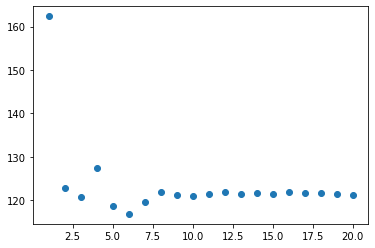

In [205]:
plt.scatter(x=hyper_params, y=rmse_values)
plt.show()

### Varying features and hyperparameters

In [ ]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [ ]:
plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Practice the workflow

In [ ]:
two_features = ['accommodates', 'bathrooms']

In [ ]:
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [ ]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

## Cross Validation

In [ ]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [ ]:
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

In [ ]:
split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

### Holdout Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

In [ ]:
# First half
model = KNeighborsRegressor()
model.fit(train_one[['accommodates']], train_one['price'])
test_one["predicted_price"] = model.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], test_one["predicted_price"])**(1/2)

In [ ]:
iteration_one_rmse

In [ ]:
# Second half
model = KNeighborsRegressor()
model.fit(train_two[['accommodates']], train_two['price'])
test_two["predicted_price"] = model.predict(test_two[['accommodates']])
iteration_two_rmse = mean_squared_error(test_two['price'], test_two["predicted_price"])**(1/2)

In [ ]:
iteration_two_rmse

In [ ]:
avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

In [ ]:
avg_rmse

### K-Fold Cross Validation

In [ ]:
dc_listings.loc[dc_listings.index[0:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [ ]:
dc_listings['fold'].value_counts()

In [ ]:
dc_listings['fold'].isnull().sum()

### First iteration

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error






### Function for training models

In [ ]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

In [ ]:
def train_and_validate(df, folds):


In [ ]:
rmses = train_and_validate(dc_listings, fold_ids)

In [ ]:
rmses

In [ ]:
avg_rmse = np.mean(rmses)

In [ ]:
avg_rmse

###  Performing K-Fold Cross Validation Using Scikit-Learn

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

###  Exploring Different K Values

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]



###  Bias-Variance Tradeoff

## Vaja: Predicting Car Prices

### Introduction To The Data Set

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# imena stolpcev

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
cars = pd.read_csv('data/imports-85.data', names=cols)

In [ ]:
# Select only the columns with continuous values from
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']



In [ ]:
numeric_cars.head()

### Data Cleaning

### Univariate Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



### Multivariate Model

### Hyperparameter Tuning